In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker    

In [407]:
df = pd.read_csv('athlete_events.csv', delimiter=',') 

In [408]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [409]:
df.shape

(271116, 15)

In [410]:
def plot(x,y,b,x_label,y_label):
    """Plots scatter plot and regression line."""
    plt.scatter(x,y,color='m',marker='o',s=30)
    # linear regression formula Y = a + bX
    y_pred = b[0] + b[1]*x
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d cm'))
    plt.plot(x,y_pred, color = 'g')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [411]:
def get_linear_regression_coefficients(x,y):
    """Calculates linear regression cofficients
       for linear regression formula y= a + bX
       returns a & b coefficients"""
    # x axis array size
    n = np.size(x)
    # average x & y array element
    avg_x, avg_y = np.mean(x), np.mean(y)
    SS_xy = np.sum(y*x - n*avg_y*avg_x)
    SS_xx = np.sum(x*x - n*avg_x*avg_x)
    # Regression coefficients
    b = SS_xy / SS_xx
    a = avg_y - b*avg_x
    return(a, b)

In [412]:
year_height_sex = df[['Year', 'Height', 'Sex']].dropna()

In [413]:
male_year_height = year_height[year_height.Sex == 'M']
male_year_height = male_year_height.groupby('Year').mean().reset_index()

In [414]:
male_year_height

,Year,Height
0,1896,172.739130
1,1900,176.637931
2,1904,175.788732
3,1906,178.206226
4,1908,177.543158
5,1912,177.447989
6,1920,176.144772
7,1924,175.418085
8,1928,175.840223
9,1932,174.931942


In [415]:
x = male_year_height['Year']

In [416]:
y = male_year_height['Height']

In [417]:
a,b = get_linear_regression_coefficients(x,y)

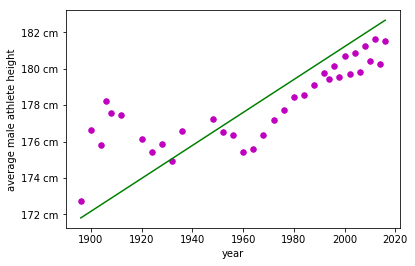

In [418]:
plot(x,y,[a,b],'year', 'average male athlete height')
# Average height of male athletes is increasing
# over the years. Although linear regression 
# line (especially before 1960) unable to capture
# the pattern of data. This could be under-fitting.


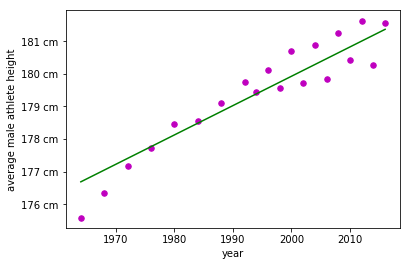

In [419]:
male_year_height_1960 = male_year_height[male_year_height.Year > 1960]
x_1960 = male_year_height_1960['Year']
y_1960 = male_year_height_1960['Height']
a_1960,b_1960 = get_linear_regression_coefficients(x_1960,y_1960)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d cm'))
plot(x_1960,y_1960,[a_1960,b_1960],'year', 'average male athlete height')

# If we take data from 1960, it fits linear
# regression line much better.


In [420]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [421]:
x = np.array(x)

In [422]:
y = np.array(y)

In [423]:
# Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg].
# Returns a vector of coefficients p that minimises 
# the squared error in the order deg.
z = np.polyfit(x, y, deg=5)

In [424]:
# Construct the polynomia
f = np.poly1d(z)

In [425]:
# Returns num evenly spaced samples, calculated over the interval [start, stop].
x_new = np.linspace(start=x[0], stop=x[-1], num=50)

In [426]:
y_new = f(x_new)


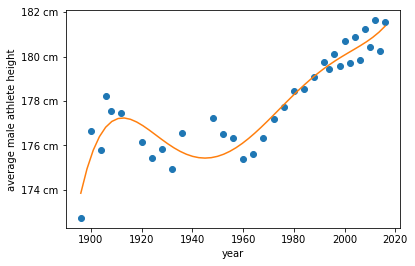

In [427]:
plt.xlabel("year")
plt.ylabel("average male athlete height")
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d cm'))
plt.plot(x,y,'o', x_new, y_new)

# Polynomial regression of degree 5, captures
# data pattern much better, than linear 
# regression.
